<a href="https://colab.research.google.com/github/Aatka-Saleem/Artificial-Intelligence-LAB/blob/main/Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df=pd.read_csv("/content/cereal_clean.csv")
df

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,1.0,68.402973
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,1.0,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,1.0,59.425505
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,1.0,93.704912
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,1.0,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3,60,25,1.0,39.106174
73,Trix,110,1,1,140,0.0,13.0,12,25,25,1.0,27.753301
74,Wheat Chex,100,3,1,230,3.0,17.0,3,115,25,1.0,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3,110,25,1.0,51.592193


In [ ]:
# --- Step 3: Define Target (y) and Features (X) ---
# Target variable: 'rating'
y = df['rating']

# Feature variables (Independent variables): Key nutritional columns
feature_cols = ['calories', 'protein', 'fat', 'fiber', 'sugars', 'carbo', 'potass']
X = df[feature_cols]

print(f"Features used (m={len(feature_cols)}): {feature_cols}")

Features used (m=7): ['calories', 'protein', 'fat', 'fiber', 'sugars', 'carbo', 'potass']


In [ ]:
# --- Step 4: Split the Data ---
# Split data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training Samples: 61
Testing Samples: 16


In [ ]:
# --- Step 5: Train the Model ---
# Initialize the Multivariable Linear Regression model
model = LinearRegression()

# Fit the model to the training data to find optimal theta values (weights/coefficients)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# --- Step 6: Make Predictions and Evaluate ---
# Make predictions on the test and train set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)





In [ ]:
# --- Step 7: Display Results (The Final Hypothesis Function) ---
print("\n" + "="*40)
print("     MULTIVARIABLE LINEAR REGRESSION RESULTS")
print("="*40)

# The y-intercept (Bias term, theta_0)
print(f"Intercept (θ₀): {model.intercept_:.4f}")

# The coefficients (Weights, theta_1, theta_2, ..., theta_m)
print("\nCoefficients (Weights):")
for feature, coeff in zip(feature_cols, model.coef_):
    print(f"  θ_{feature} ({feature}): {coeff:.4f}")


     MULTIVARIABLE LINEAR REGRESSION RESULTS
Intercept (θ₀): 60.6740

Coefficients (Weights):
  θ_calories (calories): -0.2575
  θ_protein (protein): 3.0098
  θ_fat (fat): -1.5582
  θ_fiber (fiber): 3.0756
  θ_sugars (sugars): -1.0340
  θ_carbo (carbo): 0.5206
  θ_potass (potass): -0.0343


In [ ]:
# print(f"\nR-squared (R²) Score: {r_squared:.4f} (Model Fit)")
print(f"\nR² value on TRAIN set: {r2_train:.4f}")
print(f"R² value on TEST set : {r2_test:.4f}")
# Final Hypothesis Equation Summary
equation_terms = [f"{model.intercept_:.4f}"]
for feature, coeff in zip(feature_cols, model.coef_):
    sign = "+" if coeff >= 0 else "-"
    equation_terms.append(f"{sign} {abs(coeff):.4f} * {feature}")

print("\nPredicted Rating (ŷ) = " + " ".join(equation_terms))


R² value on TRAIN set: 0.8935
R² value on TEST set : 0.9112

Predicted Rating (ŷ) = 60.6740 - 0.2575 * calories + 3.0098 * protein - 1.5582 * fat + 3.0756 * fiber - 1.0340 * sugars + 0.5206 * carbo - 0.0343 * potass


In [ ]:
test_results = X_test.copy()
test_results['Actual Rating'] = y_test
test_results['Predicted Rating'] = y_test_pred
test_results['Cereal Name'] = df.loc[y_test.index, 'name']

best_cereal = test_results.loc[test_results['Predicted Rating'].idxmax()]
print("\nBest Cereal from Test Set:")
print(f" 🥣 Name: {best_cereal['Cereal Name']}")
print(f" ⭐ Predicted Rating: {best_cereal['Predicted Rating']:.2f}")


Best Cereal from Test Set:
 🥣 Name: 100% Bran
 ⭐ Predicted Rating: 70.68


In [ ]:
# --- Step 10: Predict for a New Chocolate Bread ---
new_data = pd.DataFrame([{
    'calories': 49,
    'protein': 3.5,
    'fat': 0,
    'sodium': 138,
    'fiber': 17,
    'carbo': 10,
    'sugars': 0.5,
    'potass': 350,
    'vitamins': 10,
    'weight': 1
}])

# Select only the features used during training
new_data = new_data[feature_cols]

predicted_rating = model.predict(new_data)[0]
print(f"\nPredicted Rating for Chocolate Bread: {predicted_rating:.2f}")

# Nutrition category
if predicted_rating < 30:
    level = "Poor"
elif predicted_rating < 50:
    level = "Average"
elif predicted_rating < 70:
    level = "Healthy"
else:
    level = "Excellent"

print(f"So, the cereal is categorized as: {level.upper()}.")


Predicted Rating for Chocolate Bread: 103.55
So, the cereal is categorized as: EXCELLENT.


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(y_test - y_test_pred, bins=15, kde=True, color='purple')
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[feature_cols + ['rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

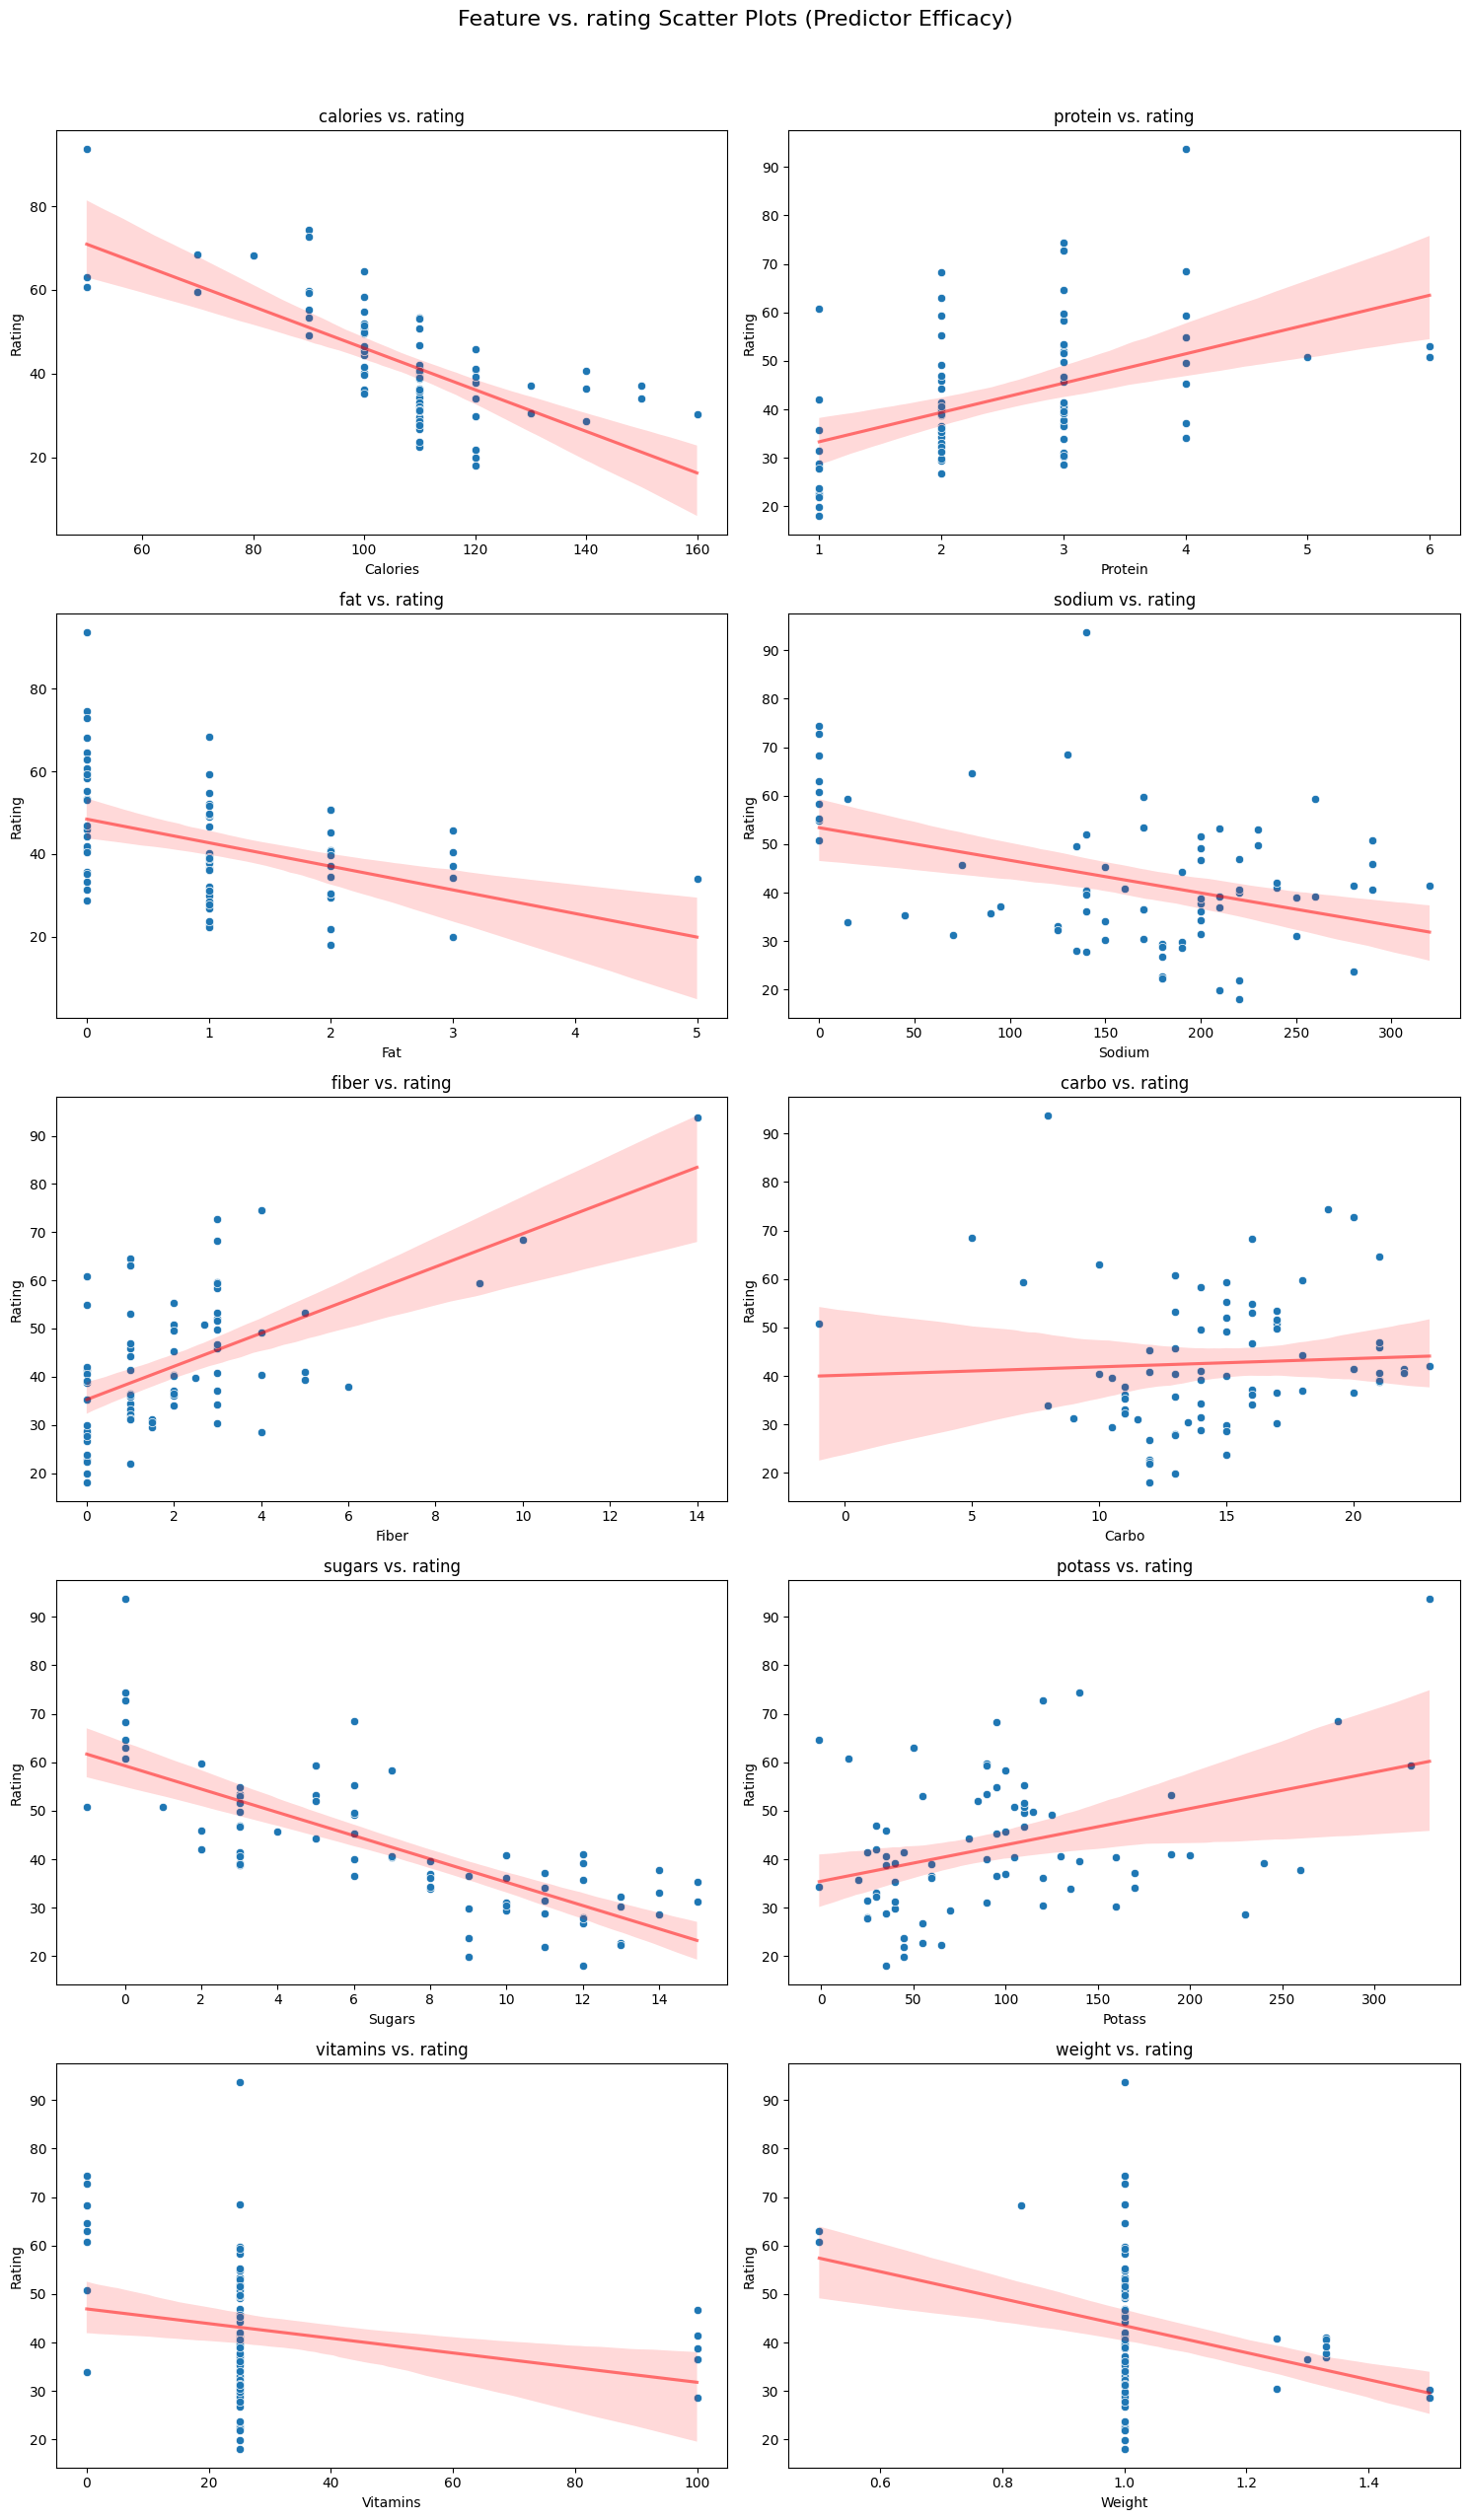

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# And the features are:
predictor_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight']
target_col = 'rating'
n_features = len(predictor_cols)

# Set up the subplot layout (5 rows x 2 columns for 10 features)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
fig.suptitle(f'Feature vs. {target_col} Scatter Plots (Predictor Efficacy)', fontsize=16, y=1.02)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate the scatter plots
for i, col in enumerate(predictor_cols):
    # Use scatterplot to plot the points
    sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i])
    # Use regplot with scatter=False to add a red regression line
    sns.regplot(x=df[col], y=df[target_col], scatter=False, color='red', ax=axes[i], line_kws={'alpha': 0.5})
    axes[i].set_title(f'{col} vs. {target_col}')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel(target_col.title())

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('feature_vs_rating_scatter_plots.png')